In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn import metrics

In [2]:
resumeDataSet = pd.read_csv('resume_dataset.csv')
resumeDataSet['cleaned_resume'] = ''
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",


In [3]:
print ("Distinct categories of resume -")
print (resumeDataSet['Category'].unique())

Distinct categories of resume -
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [4]:
print ("Distinct categories of resume and the number of records belonging to each category -")
print (resumeDataSet['Category'].value_counts())

Distinct categories of resume and the number of records belonging to each category -
Category
Java Developer               14
Database                     11
HR                           11
Data Science                 10
Advocate                     10
DotNet Developer              7
Hadoop                        7
DevOps Engineer               7
Automation Testing            7
Testing                       7
Civil Engineer                6
Business Analyst              6
SAP Developer                 6
Health and fitness            6
Python Developer              6
Arts                          6
Electrical Engineering        5
Sales                         5
Network Security Engineer     5
Mechanical Engineer           5
Web Designing                 5
ETL Developer                 5
Blockchain                    5
Operations Manager            4
PMO                           3
Name: count, dtype: int64


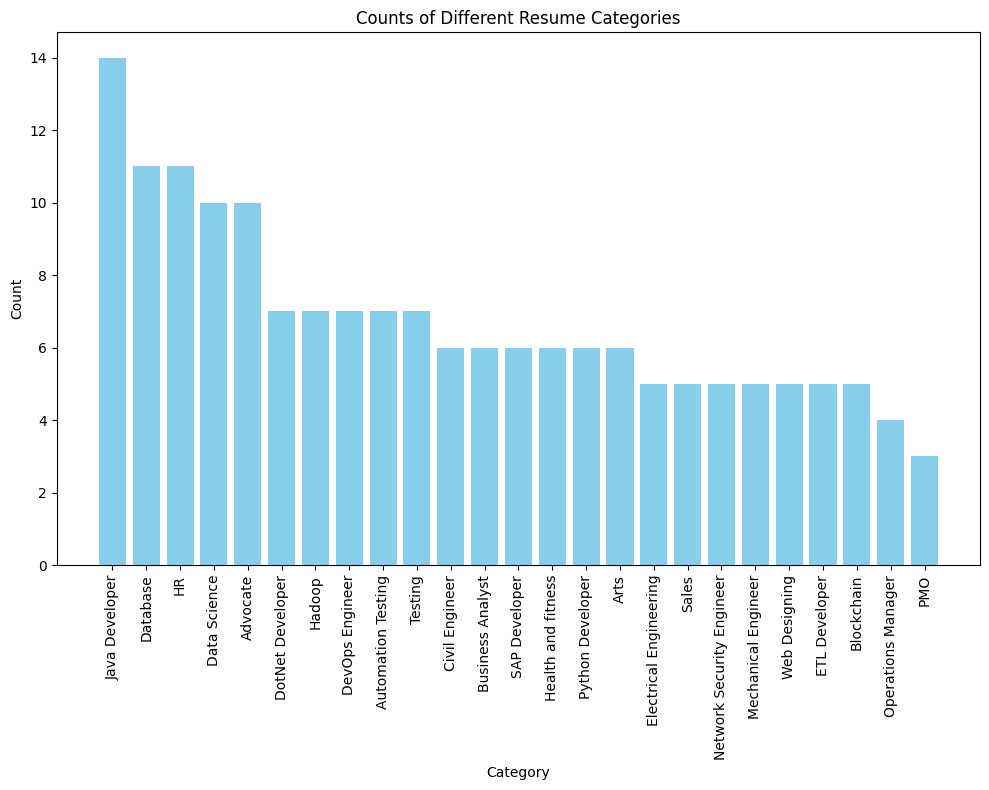

In [16]:
categories = resumeDataSet['Category']
category_counts = resumeDataSet['Category'].value_counts()

plt.figure(figsize=(10, 8))
plt.bar(category_counts.index, category_counts.values, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Counts of Different Resume Categories')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

In [17]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))

In [20]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()

for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])

resumeDataSet.head()


,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \nMay 2013 to May 2017 B.E ...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \n MCA YMCAUST, Faridabad...",Education Details MCA YMCAUST Faridabad Haryan...


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1500)
X = vectorizer.fit_transform(resumeDataSet['cleaned_resume']).toarray()
y = resumeDataSet['Category']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
report_logistic = classification_report(y_test, y_pred_logistic)

print("Logistic Regression")
print(f'Accuracy: {accuracy_logistic * 100:.2f}%')
print('Classification Report:')
print(report_logistic)

Logistic Regression
Accuracy: 44.12%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         1
           6       0.25      1.00      0.40         1
           7       0.33      1.00      0.50         1
           8       0.00      0.00      0.00         0
           9       1.00      1.00      1.00         1
          11       0.00      0.00      0.00         1
          12       1.00      0.20      0.33         5
          13       1.00      1.00      1.00         2
          14       1.00      0.50      0.67         2
          15       0.20      1.00      0.33         3
          16       0.00      0.00      0.00         2
          17       1.

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest")
print(f'Accuracy: {accuracy_rf * 100:.2f}%')
print('Classification Report:')
print(report_rf)

Random Forest
Accuracy: 61.76%
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         3
           1       0.50      1.00      0.67         1
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         1
           6       0.50      1.00      0.67         1
           7       1.00      1.00      1.00         1
           8       0.00      0.00      0.00         0
           9       1.00      1.00      1.00         1
          11       0.00      0.00      0.00         1
          12       0.75      0.60      0.67         5
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       0.50      1.00      0.67         3
          16       0.00      0.00      0.00         2
          17       1.00      1.00      1.00         1
          18       0.00    

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
report_gb = classification_report(y_test, y_pred_gb)

print("Gradient Boosting")
print(f'Accuracy: {accuracy_gb * 100:.2f}%')
print('Classification Report:')
print(report_gb)

Gradient Boosting
Accuracy: 67.65%
Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       0.50      1.00      0.67         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         1
           7       1.00      1.00      1.00         1
           9       0.00      0.00      0.00         1
          11       1.00      1.00      1.00         1
          12       0.67      0.80      0.73         5
          13       0.67      1.00      0.80         2
          14       1.00      0.50      0.67         2
          15       0.67      0.67      0.67         3
          16       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         1
          18       0.00      0.00      0.00         1
          19       0.00

In [28]:
print("Model Comparison")
print(f'Logistic Regression Accuracy: {accuracy_logistic * 100:.2f}%')
print(f'Random Forest Accuracy: {accuracy_rf * 100:.2f}%')
print(f'Gradient Boosting Accuracy: {accuracy_gb * 100:.2f}%')

Model Comparison
Logistic Regression Accuracy: 44.12%
Random Forest Accuracy: 61.76%
Gradient Boosting Accuracy: 67.65%
